In [199]:
import networkx as nx 
import matplotlib.pyplot as plt 
import time
from datetime import datetime, timedelta   
from collections import deque
import tracemalloc

Класс, создающий случайный связный граф, имеющий V вершин и E ребер.

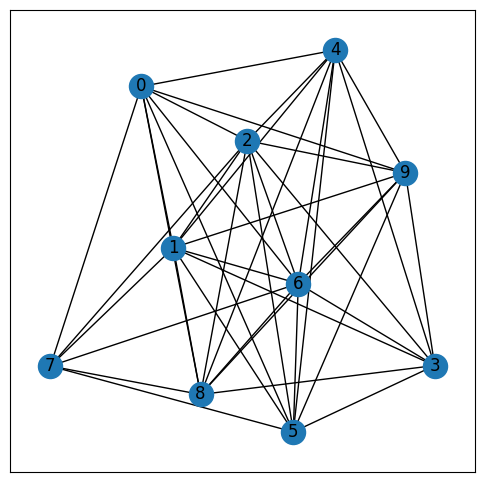

In [243]:
class RandomConnectedGraph: 
    
    def __init__(self, v, e): 
        self.visual = []
        self.nodes = [0]
        self.graph = {0: []}
        self.generate_connected_graph(v=v, e=e)

    def generate_connected_graph(self, v=100, e=1000):
        for i in range(1, v):
            self.addEdge(i-1, i)
        for _ in range(e-v+1):
            possible_a = [i for i in self.nodes if len(self.graph[i])<(v-1)]
            a = random.choice(possible_a)
            possible_b = [i for i in self.nodes if i not in self.graph[a]+[a]]
            b = random.choice(possible_b)
            self.addEdge(a, b)
    
    def addEdge(self, a, b): 
        temp = [a, b] 
        self.visual.append(temp)
        self.graph[a].append(b)
        if b not in self.nodes:
            self.nodes.append(b)
            self.graph[b] = [a]
        else:
            self.graph[b].append(a)

    def visualize(self): 
        G = nx.Graph() 
        G.add_edges_from(self.visual) 
        plt.figure(figsize=(6,6))
        nx.draw_networkx(G) 
        plt.show() 


G = RandomConnectedGraph(10, 40)
G.visualize() 

Функция, которая будет проверять корректность работы моей реализации поиска в ширину. 

Для проверки корректности достаточно убедиться, что алгоритм обошел все вершины графа. В ходе работы алгоритма будем добавлять вершины в список, а в конце проверим, что его длина равна числу вершин в графе, и все вершины в списке уникальны.

In [244]:
def correctness_check(list_of_visited, v):
    if len(list_of_visited)==v and len(set(list_of_visited))==v:
        pass
    else:
        raise Exception

Поиск в ширину, используя List в качестве очереди. 

In [245]:
def BFS_list(G, s):
    visited = [False] * (max(G.graph) + 1)  # O(v)
    queue = []   # O(1)
    queue.append(s)   # O(1)
    visited[s] = True  # O(1)
    list_of_visited = []   # O(1)
    while queue:
        # весь блок выполняем  v раз
        s = queue.pop(0)   #  O(v) (сложность list.pop())
        list_of_visited.append(s) #  O(1) (сложность list.append())
        for i in G.graph[s]:  # всего 2e раз
            if visited[i] == False: # O(1)
                queue.append(i) # O(1)
                visited[i] = True # O(1)
    correctness_check(list_of_visited, len(G.nodes))


Сложность по времени O(v + v\**2 + 2e) =  O(v\**2), так как извлечение первого элемента очереди реализовано не оптимально. Сложность по памяти O(v).

Замер времени выполнения кода и пикового потребления памяти. 

In [273]:
list_times = []
list_memories = []

for v in [10, 100, 1000, 10000]:
    time = timedelta(0)
    peak_memory = 0
    
    G = RandomConnectedGraph(v=v, e=min(v*10, int(v*(v-1)/2)))
    for _ in range(10):
        tracemalloc.start()
        start = datetime.now()
        BFS_list(G, 0)
        time += datetime.now()-start
        peak_memory += tracemalloc.get_traced_memory()[1]
        tracemalloc.stop()
            
    list_times.append(time.total_seconds() / 10)
    list_memories.append(peak_memory / 10)

    print(f"""V: {v}, E: {int(min(v*10, v*(v-1)/2))} || mean_time: {round(time.total_seconds() / 10, 4)}sec, mean_peak_memory_usage: {round(peak_memory / 10 /(1024*1024), 4)}Mb""")

V: 10, E: 45 || mean_time: 0.0sec, mean_peak_memory_usage: 0.001Mb
V: 100, E: 1000 || mean_time: 0.0003sec, mean_peak_memory_usage: 0.0116Mb
V: 1000, E: 10000 || mean_time: 0.0017sec, mean_peak_memory_usage: 0.0554Mb
V: 10000, E: 100000 || mean_time: 0.03sec, mean_peak_memory_usage: 0.7828Mb


BFS реализованный более оптимально, с помощью очереди (collections.deque).

In [246]:
def BFS_deque(G, s):
    visited = [False] * (max(G.graph) + 1)
    queue = deque()
    queue.append(s)
    visited[s] = True
    list_of_visited = []
    while queue:
        s = queue.popleft()  #  O(1) 
        list_of_visited.append(s)
        for i in G.graph[s]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True
    correctness_check(list_of_visited, len(G.nodes))

Сложность по времени O(v+e). Сложность по памяти O(v).

Замер времени выполнения кода и пикового потребления памяти. 

In [274]:
deque_times = []
deque_memories = []

for v in [10, 100, 1000, 10000]:
    time = timedelta(0)
    peak_memory = 0
    
    G = RandomConnectedGraph(v=v, e=min(v*10, int(v*(v-1)/2)))
    for _ in range(10):
        tracemalloc.start()
        start = datetime.now()
        BFS_deque(G, 0)
        time += datetime.now()-start
        peak_memory += tracemalloc.get_traced_memory()[1]
        tracemalloc.stop()
            
    deque_times.append(time.total_seconds() / 10)
    deque_memories.append(peak_memory / 10)

    print(f"""V: {v}, E: {int(min(v*10, v*(v-1)/2))} || mean_time: {round(time.total_seconds() / 10, 4)}sec, mean_peak_memory_usage: {round(peak_memory / 10 /(1024*1024), 4)}Mb""")

V: 10, E: 45 || mean_time: 0.0sec, mean_peak_memory_usage: 0.0011Mb
V: 100, E: 1000 || mean_time: 0.0001sec, mean_peak_memory_usage: 0.0117Mb
V: 1000, E: 10000 || mean_time: 0.0021sec, mean_peak_memory_usage: 0.0555Mb
V: 10000, E: 100000 || mean_time: 0.0203sec, mean_peak_memory_usage: 0.7909Mb
